0.0369559016155936
0.006802069526817869


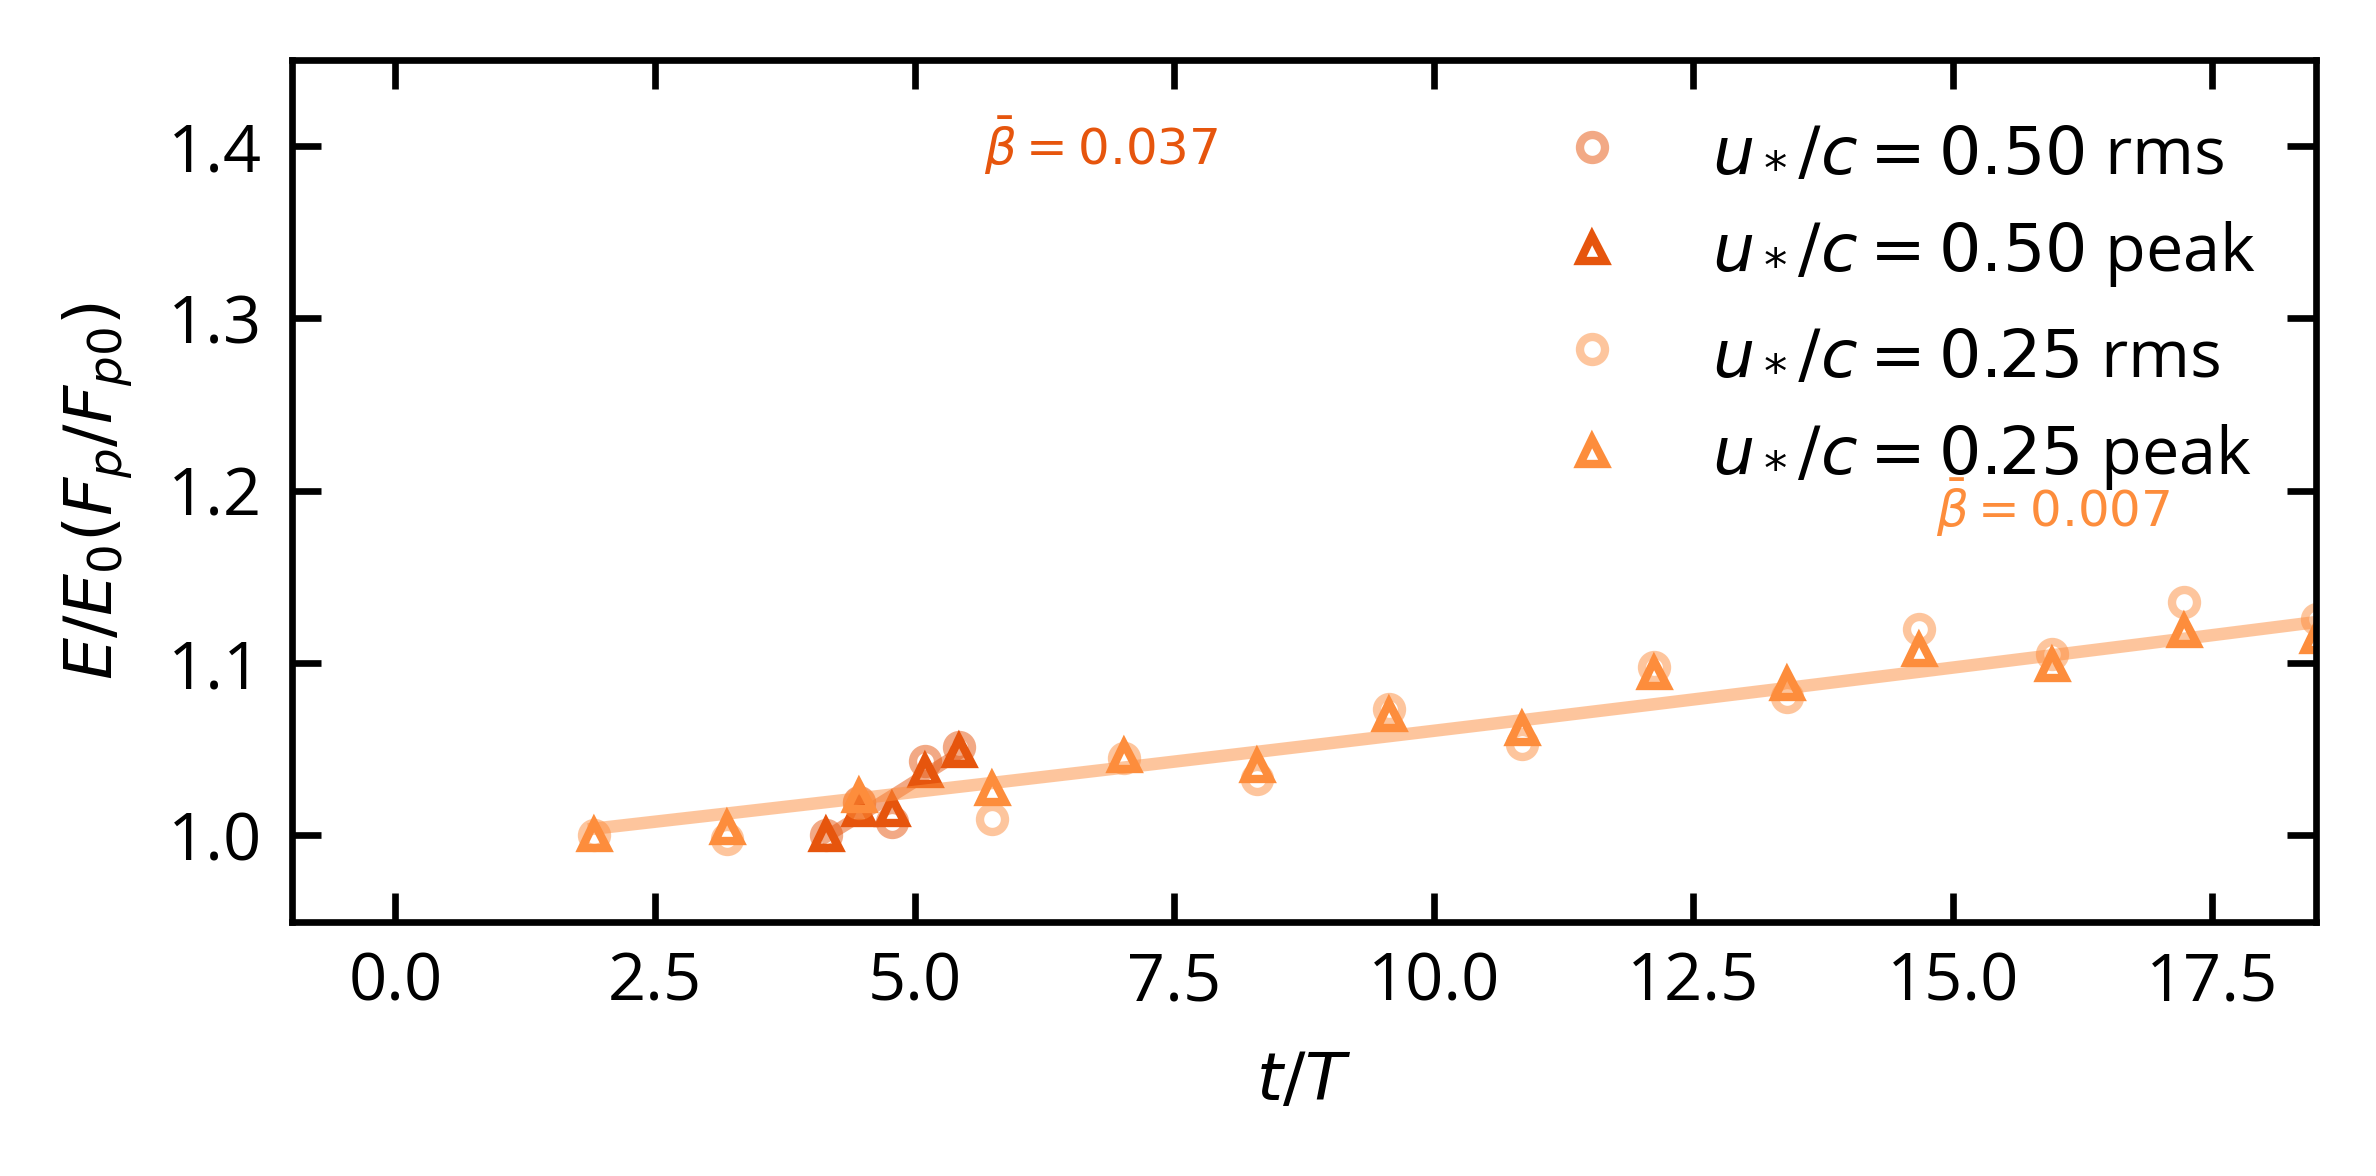

In [200]:
"""Wave growth plot"""

fig = plt.figure(figsize=[4,2]); ax = plt.gca()

"""Plot the rms eta or the Fp"""
def plotE(case, markercolor=plt.get_cmap('tab20c')(4)):
    T = 2*np.pi/case.wave.omega     
    plt.plot(case.t/T, case.Erms/case.Erms[0], marker = 'o', mfc='none',
             label=r'$u_*/c=%.2f$ rms' %(case.ustar/case.wave.c), lw=0, markersize=3, color=markercolor, alpha = 0.5) 
    plt.plot(case.t/T, case.Ep/case.Ep[0], color=markercolor, marker = '^', mfc='none',
             markeredgewidth=1, lw=0, markersize=3, label=r'$u_*/c=%.2f$ peak' %(case.ustar/case.wave.c))

"""Fit an exponential"""
def fit_exponential(case, linecolor=plt.get_cmap('tab20c')(4)):
    T = 2*np.pi/case.wave.omega
    case.wa, wb = np.polyfit(case.t/T, np.log(case.Ep/case.Ep[0]), 1)
    plt.plot(case.t/T, np.exp(case.wa*case.t/T+wb), color=linecolor, alpha = 0.5)
    print(case.wa)

colorscheme = (plt.get_cmap('tab20c')(4),plt.get_cmap('tab20c')(5))
for (case, color) in zip((case1,case2), colorscheme):
    plotE(case, color)
    fit_exponential(case, color)


ax.text(0.4, 0.9, r'$\bar{\beta} = %.3f$' % case1.wa, ha='center', va='center', rotation=0., fontsize=6, 
        color=plt.get_cmap('tab20c')(4), transform=ax.transAxes)
ax.text(0.87, 0.48, r'$\bar{\beta} = %.3f$' % case2.wa, ha='center', va='center', rotation=0., fontsize=6, 
        color=plt.get_cmap('tab20c')(5), transform=ax.transAxes)
plt.xlabel(r'$t/T$'); plt.ylabel(r'$E/E_0 (F_p/F_{p0})$'); plt.ylim([0.95,1.45]); plt.xlim([-1,18.5])
plt.legend(loc='upper right')

In [167]:
"""Compute the time series of peak frequency energy."""
case = case2
case.Ep = []; case.Erms = []
case.interface = [] # Sampling interface (full information)
for t in tqdm(case.t):
    interface = Interface2D(L0 = case.L0, N = case.N, 
                            path = case.path, pre='eta/eta_loc_t', t = t, PRUNING=True)
    interface.spectrum(peak = 4)
    case.interface.append(interface)
    case.Ep.append(interface.Ep)
    case.Erms.append(np.std(interface.eta)**2)

 10%|█         | 2/20 [00:16<02:25,  8.06s/it]/home/jiarong/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
 15%|█▌        | 3/20 [00:24<02:17,  8.10s/it]/home/jiarong/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
 25%|██▌       | 5/20 [00:40<02:01,  8.13s/it]/home/jiarong/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
 30%|███       | 6/20 [00:49<01:55,  8.23s/it]/home/jiarong/anaconda3/lib/pytho

In [185]:
case = case1
case.Ep = np.array(case.Ep); case.Erms = np.array(case.Erms)
case.t = np.array(case.t-case.tstart)

In [184]:
case1.tstart = 57